In [215]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
import json

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
from datetime import datetime
from matplotlib.dates import date2num

#from secret import *

### LOAD DATA FROM SYSTEM OR WEB

In [23]:
if os.path.isfile("afl.com.au_full_data_set_new.csv"):
    filepath_afl = "afl.com.au_full_data_set_new.csv"
    print ("afl.com.au loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



afl.com.au loading from file


In [130]:
if os.path.isfile("afl_wiki_data_set.csv"):
    filepath_wiki = "afl_wiki_data_set.csv"
    print ("afl_wiki loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl_wiki loading from the internet")




afl_wiki loading from file


### READ CSV FILE

In [24]:
df_afl= pd.read_csv(filepath_afl)
print ("done")

done


In [131]:
df_wiki= pd.read_csv(filepath_wiki)
print ("done")

done


In [132]:
def get_teamname_home(row):
    di_teamnames= {'Essendon': 'Essendon',
                   'Brisbane Lions': 'Brisbane Lions',
                   'Carlton': 'Carlton',
                   'Hawthorn': 'Hawthorn',
                   'Richmond': 'Richmond',
                   'Port Adelaide': 'Port Adelaide',
                   'Kangaroos': 'North Melbourne',
                   'North Melbourne': 'North Melbourne',
                   'Fremantle': 'Fremantle',
                   'Western Bulldogs': 'Western Bulldogs',
                   'Geelong': 'Geelong Cats',
                   'Melbourne': 'Melbourne',
                   'Sydney': 'Sydney Swans',
                   'Collingwood': 'Collingwood',
                   'Adelaide': 'Adelaide Crows',
                   'St Kilda':  'St Kilda',
                   'West Coast': 'West Coast Eagles',
                   'Gold Coast':'Gold Coast Suns',
                   'Greater Western Sydney': 'GWS Giants'}
                
    return di_teamnames[row.Home_Team]

In [133]:
def get_teamname_away(row):
    di_teamnames= {'Essendon': 'Essendon',
                   'Brisbane Lions': 'Brisbane Lions',
                   'Brisbane': 'Brisbane Lions',
                   'Carlton': 'Carlton',
                   'Hawthorn': 'Hawthorn',
                   'Richmond': 'Richmond',
                   'Port Adelaide': 'Port Adelaide',
                   'Kangaroos': 'North Melbourne',
                   'North Melbourne': 'North Melbourne',
                   'Fremantle': 'Fremantle',
                   'Western Bulldogs': 'Western Bulldogs',
                   'Geelong': 'Geelong Cats',
                   'Melbourne': 'Melbourne',
                   'Sydney': 'Sydney Swans',
                   'Collingwood': 'Collingwood',
                   'Adelaide': 'Adelaide Crows',
                   'St Kilda':  'St Kilda',
                   'West Coast': 'West Coast Eagles',
                   'Gold Coast':'Gold Coast Suns',
                   'Greater Western Sydney': 'GWS Giants'}
                
    return di_teamnames[row.Away_Team]

In [134]:
df_wiki["Home_Filter"] = df_wiki.apply(get_teamname_home, axis=1)

In [135]:
df_wiki["Away_Filter"] = df_wiki.apply(get_teamname_away, axis=1)

In [17]:
df_afl.dtypes

Unnamed: 0                       int64
Unnamed: 0.1                     int64
BEHINDS                          int64
BOUNCES                          int64
CENTRECLEARANCES                 int64
CLANGERS                         int64
CONTESTEDMARKS                   int64
CONTESTEDPOSSESSIONS             int64
DISPOSALEFFICIENCY             float64
DISPOSALS                        int64
DREAMTEAMPOINTS                  int64
FREESAGAINST                     int64
FREESFOR                         int64
GOALACCURACY                   float64
GOALASSISTS                      int64
GOALEFFICIENCY                 float64
GOALS                            int64
HANDBALLS                        int64
HITOUTS                          int64
HOME                              bool
INSIDE50S                        int64
INTERCEPTS                     float64
INTERCHANGECOUNTS               object
KICKS                            int64
LASTUPDATED                     object
MARKS                    

In [136]:
def wiki_total_score(x):
    score = x.Away_Total + x.Home_Total
    return (score)

In [137]:
df_wiki['Match_Total_Score']= df_wiki.apply(wiki_total_score, axis =1)

In [138]:
df_wiki.dtypes

Unnamed: 0            int64
Away_Behinds         object
Away_Goals            int64
Away_Team            object
Away_Total            int64
Crowd                 int64
Date                  int64
Day                  object
Home_Behinds         object
Home_Goals            int64
Home_Team            object
Home_Total            int64
Match_Link           object
Month                object
Round                object
Structured_Data      object
Time                 object
Venue                object
Year                  int64
City                 object
station_ID           object
URL                  object
Rain                 object
Home_Filter          object
Away_Filter          object
Match_Total_Score     int64
dtype: object

In [221]:
def wiki_data_row (row, colname):

    ## Elements to Match
    AFL_Year = row.YEAR
    AFL_Total = row.TOTAL_SCORE 
    
    if row.HOME == True: 
        AFL_Home_Team = row.TEAMNAME
        AFL_Away_Team = row.OPPONENT
    
    elif row.HOME == False:
        AFL_Home_Team = row.OPPONENT
        AFL_Away_Team = row.TEAMNAME
    
    else:
        print (row, "error has occured")
                     

    wiki_row = df_wiki.loc[(df_wiki.Away_Filter  == AFL_Away_Team) & (df_wiki.Home_Filter == AFL_Home_Team) & (df_wiki.Year == AFL_Year) & (df_wiki.Match_Total_Score == AFL_Total)]
    #print (AFL_Home_Team,AFL_Away_Team, AFL_Year, AFL_Total)
    element = list(wiki_row[colname])[0]
    print (wiki_row.index)
    print (element)
    return (element)
    #return (matching_row)
    #return ("print here")

def get_crowd(row):
    return int(wiki_data_row (row, "Crowd"))

def get_rain(row):
    result = wiki_data_row (row, "Rain")
    try: 
        return float(result)
    except: 
        return ("No Data")

def get_city(row):
    return wiki_data_row (row, "City")

def get_venue(row):
    return wiki_data_row (row, "Venue")

def get_structured_data(row):
    # https://docs.python.org/2/library/time.html
    time_result= wiki_data_row (row, "Structured_Data")
    struct_time = time.strptime(time_result, "%d/%m/%Y %H:%M")
    dt = datetime.fromtimestamp(time.mktime(struct_time))
    #return (struct_time)
    return (dt)
    


def get_match_link(row):
    return str(wiki_data_row (row, "Match_Link"))

def get_bom_url(row):
    return wiki_data_row (row, "URL")

def get_date(row):
    return wiki_data_row (row, "Date")

def get_round(row):
    return wiki_data_row (row, "Round")

def get_day(row):
    return wiki_data_row (row, "Day")

def get_month(row):
    return wiki_data_row (row, "Month")

In [140]:
df_afl["CROWD"] = df_afl.apply(get_crowd, axis=1)

Int64Index([3081], dtype='int64')
73137
Int64Index([3081], dtype='int64')
73137
Int64Index([3082], dtype='int64')
66254
Int64Index([3082], dtype='int64')
66254
Int64Index([3084], dtype='int64')
36249
Int64Index([3084], dtype='int64')
36249
Int64Index([3083], dtype='int64')
33129
Int64Index([3083], dtype='int64')
33129
Int64Index([3086], dtype='int64')
12710
Int64Index([3086], dtype='int64')
12710
Int64Index([3085], dtype='int64')
78294
Int64Index([3085], dtype='int64')
78294
Int64Index([3087], dtype='int64')
21997
Int64Index([3087], dtype='int64')
21997
Int64Index([3088], dtype='int64')
43993
Int64Index([3088], dtype='int64')
43993
Int64Index([3089], dtype='int64')
34638
Int64Index([3089], dtype='int64')
34638
Int64Index([3090], dtype='int64')
58236
Int64Index([3090], dtype='int64')
58236
Int64Index([3091], dtype='int64')
42834
Int64Index([3091], dtype='int64')
42834
Int64Index([3092], dtype='int64')
37420
Int64Index([3092], dtype='int64')
37420
Int64Index([3093], dtype='int64')
8022
I

In [144]:
df_afl.dtypes

Unnamed: 0                       int64
Unnamed: 0.1                     int64
BEHINDS                          int64
BOUNCES                          int64
CENTRECLEARANCES                 int64
CLANGERS                         int64
CONTESTEDMARKS                   int64
CONTESTEDPOSSESSIONS             int64
DISPOSALEFFICIENCY             float64
DISPOSALS                        int64
DREAMTEAMPOINTS                  int64
FREESAGAINST                     int64
FREESFOR                         int64
GOALACCURACY                   float64
GOALASSISTS                      int64
GOALEFFICIENCY                 float64
GOALS                            int64
HANDBALLS                        int64
HITOUTS                          int64
HOME                              bool
INSIDE50S                        int64
INTERCEPTS                     float64
INTERCHANGECOUNTS               object
KICKS                            int64
LASTUPDATED                     object
MARKS                    

In [154]:
df_afl["RAIN"] = df_afl.apply(get_rain, axis=1)

Int64Index([3081], dtype='int64')
0
Int64Index([3081], dtype='int64')
0
Int64Index([3082], dtype='int64')
0
Int64Index([3082], dtype='int64')
0
Int64Index([3084], dtype='int64')
0
Int64Index([3084], dtype='int64')
0
Int64Index([3083], dtype='int64')
4.8
Int64Index([3083], dtype='int64')
4.8
Int64Index([3086], dtype='int64')
13.6
Int64Index([3086], dtype='int64')
13.6
Int64Index([3085], dtype='int64')
0
Int64Index([3085], dtype='int64')
0
Int64Index([3087], dtype='int64')
0
Int64Index([3087], dtype='int64')
0
Int64Index([3088], dtype='int64')
0
Int64Index([3088], dtype='int64')
0
Int64Index([3089], dtype='int64')
2.2
Int64Index([3089], dtype='int64')
2.2
Int64Index([3090], dtype='int64')
2.8
Int64Index([3090], dtype='int64')
2.8
Int64Index([3091], dtype='int64')
2.8
Int64Index([3091], dtype='int64')
2.8
Int64Index([3092], dtype='int64')
nan
Int64Index([3092], dtype='int64')
nan
Int64Index([3093], dtype='int64')
0
Int64Index([3093], dtype='int64')
0
Int64Index([3094], dtype='int64')
0.2


In [ ]:
df_afl["CITY"] = df_afl.apply(get_city, axis=1)

Int64Index([3081], dtype='int64')
Melbourne
Int64Index([3081], dtype='int64')
Melbourne
Int64Index([3082], dtype='int64')
Melbourne
Int64Index([3082], dtype='int64')
Melbourne
Int64Index([3084], dtype='int64')
Melbourne
Int64Index([3084], dtype='int64')
Melbourne
Int64Index([3083], dtype='int64')
Sydney
Int64Index([3083], dtype='int64')
Sydney
Int64Index([3086], dtype='int64')
Gold Coast
Int64Index([3086], dtype='int64')
Gold Coast
Int64Index([3085], dtype='int64')
Melbourne
Int64Index([3085], dtype='int64')
Melbourne
Int64Index([3087], dtype='int64')
Melbourne
Int64Index([3087], dtype='int64')
Melbourne
Int64Index([3088], dtype='int64')
Adelaide
Int64Index([3088], dtype='int64')
Adelaide
Int64Index([3089], dtype='int64')
Perth
Int64Index([3089], dtype='int64')
Perth
Int64Index([3090], dtype='int64')
Melbourne
Int64Index([3090], dtype='int64')
Melbourne
Int64Index([3091], dtype='int64')
Melbourne
Int64Index([3091], dtype='int64')
Melbourne
Int64Index([3092], dtype='int64')
Melbourne
In

In [164]:
df_afl["VENUE"] = df_afl.apply(get_venue, axis=1)

Int64Index([3081], dtype='int64')
MCG
Int64Index([3081], dtype='int64')
MCG
Int64Index([3082], dtype='int64')
MCG
Int64Index([3082], dtype='int64')
MCG
Int64Index([3084], dtype='int64')
Etihad Stadium
Int64Index([3084], dtype='int64')
Etihad Stadium
Int64Index([3083], dtype='int64')
SCG
Int64Index([3083], dtype='int64')
SCG
Int64Index([3086], dtype='int64')
Metricon Stadium
Int64Index([3086], dtype='int64')
Metricon Stadium
Int64Index([3085], dtype='int64')
MCG
Int64Index([3085], dtype='int64')
MCG
Int64Index([3087], dtype='int64')
Etihad Stadium
Int64Index([3087], dtype='int64')
Etihad Stadium
Int64Index([3088], dtype='int64')
Adelaide Oval
Int64Index([3088], dtype='int64')
Adelaide Oval
Int64Index([3089], dtype='int64')
Domain Stadium
Int64Index([3089], dtype='int64')
Domain Stadium
Int64Index([3090], dtype='int64')
MCG
Int64Index([3090], dtype='int64')
MCG
Int64Index([3091], dtype='int64')
Etihad Stadium
Int64Index([3091], dtype='int64')
Etihad Stadium
Int64Index([3092], dtype='int6

In [222]:
df_afl["STRUCT_TIME"] = df_afl.apply(get_structured_data, axis=1)

Int64Index([3081], dtype='int64')
23/03/2017 19:20
Int64Index([3081], dtype='int64')
23/03/2017 19:20
Int64Index([3082], dtype='int64')
24/03/2017 19:50
Int64Index([3082], dtype='int64')
24/03/2017 19:50
Int64Index([3084], dtype='int64')
25/03/2017 16:35
Int64Index([3084], dtype='int64')
25/03/2017 16:35
Int64Index([3083], dtype='int64')
25/03/2017 16:35
Int64Index([3083], dtype='int64')
25/03/2017 16:35
Int64Index([3086], dtype='int64')
25/03/2017 19:05
Int64Index([3086], dtype='int64')
25/03/2017 19:05
Int64Index([3085], dtype='int64')
25/03/2017 19:25
Int64Index([3085], dtype='int64')
25/03/2017 19:25
Int64Index([3087], dtype='int64')
26/03/2017 13:10
Int64Index([3087], dtype='int64')
26/03/2017 13:10
Int64Index([3088], dtype='int64')
26/03/2017 14:45
Int64Index([3088], dtype='int64')
26/03/2017 14:45
Int64Index([3089], dtype='int64')
26/03/2017 16:40
Int64Index([3089], dtype='int64')
26/03/2017 16:40
Int64Index([3090], dtype='int64')
30/03/2017 19:20
Int64Index([3090], dtype='int64

In [162]:
df_afl["MATCH_LINK"] = df_afl.apply(get_match_link, axis=1)

Int64Index([3081], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/carl-v-rich
Int64Index([3081], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/carl-v-rich
Int64Index([3082], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/coll-v-wb
Int64Index([3082], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/coll-v-wb
Int64Index([3084], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/stk-v-melb
Int64Index([3084], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/stk-v-melb
Int64Index([3083], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/syd-v-port
Int64Index([3083], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/syd-v-port
Int64Index([3086], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/gcfc-v-bl
Int64Index([3086], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/gcfc-v-bl
Int64Index([3085], dtype='int64')
http://www.afl.com.au/match-centre/2017/1/ess-v-haw
Int64Index([3085], dtype='int64')
http://www.a

In [ ]:
#df_afl["BOM_URL"] = df_afl.apply(get_bom_url, axis=1)

In [158]:
df_afl["DATE"] = df_afl.apply(get_date, axis=1)

Int64Index([3081], dtype='int64')
23
Int64Index([3081], dtype='int64')
23
Int64Index([3082], dtype='int64')
24
Int64Index([3082], dtype='int64')
24
Int64Index([3084], dtype='int64')
25
Int64Index([3084], dtype='int64')
25
Int64Index([3083], dtype='int64')
25
Int64Index([3083], dtype='int64')
25
Int64Index([3086], dtype='int64')
25
Int64Index([3086], dtype='int64')
25
Int64Index([3085], dtype='int64')
25
Int64Index([3085], dtype='int64')
25
Int64Index([3087], dtype='int64')
26
Int64Index([3087], dtype='int64')
26
Int64Index([3088], dtype='int64')
26
Int64Index([3088], dtype='int64')
26
Int64Index([3089], dtype='int64')
26
Int64Index([3089], dtype='int64')
26
Int64Index([3090], dtype='int64')
30
Int64Index([3090], dtype='int64')
30
Int64Index([3091], dtype='int64')
31
Int64Index([3091], dtype='int64')
31
Int64Index([3092], dtype='int64')
1
Int64Index([3092], dtype='int64')
1
Int64Index([3093], dtype='int64')
1
Int64Index([3093], dtype='int64')
1
Int64Index([3094], dtype='int64')
1
Int64I

In [155]:
df_afl["ROUND_WIKI"] = df_afl.apply(get_round, axis=1)

Int64Index([3081], dtype='int64')
Round 1 (Opening Round)
Int64Index([3081], dtype='int64')
Round 1 (Opening Round)
Int64Index([3082], dtype='int64')
Round 1 (Opening Round)
Int64Index([3082], dtype='int64')
Round 1 (Opening Round)
Int64Index([3084], dtype='int64')
Round 1 (Opening Round)
Int64Index([3084], dtype='int64')
Round 1 (Opening Round)
Int64Index([3083], dtype='int64')
Round 1 (Opening Round)
Int64Index([3083], dtype='int64')
Round 1 (Opening Round)
Int64Index([3086], dtype='int64')
Round 1 (Opening Round)
Int64Index([3086], dtype='int64')
Round 1 (Opening Round)
Int64Index([3085], dtype='int64')
Round 1 (Opening Round)
Int64Index([3085], dtype='int64')
Round 1 (Opening Round)
Int64Index([3087], dtype='int64')
Round 1 (Opening Round)
Int64Index([3087], dtype='int64')
Round 1 (Opening Round)
Int64Index([3088], dtype='int64')
Round 1 (Opening Round)
Int64Index([3088], dtype='int64')
Round 1 (Opening Round)
Int64Index([3089], dtype='int64')
Round 1 (Opening Round)
Int64Index([30

In [156]:
df_afl["DAY"] = df_afl.apply(get_day, axis=1)

Int64Index([3081], dtype='int64')
Thursday
Int64Index([3081], dtype='int64')
Thursday
Int64Index([3082], dtype='int64')
Friday
Int64Index([3082], dtype='int64')
Friday
Int64Index([3084], dtype='int64')
Saturday
Int64Index([3084], dtype='int64')
Saturday
Int64Index([3083], dtype='int64')
Saturday
Int64Index([3083], dtype='int64')
Saturday
Int64Index([3086], dtype='int64')
Saturday
Int64Index([3086], dtype='int64')
Saturday
Int64Index([3085], dtype='int64')
Saturday
Int64Index([3085], dtype='int64')
Saturday
Int64Index([3087], dtype='int64')
Sunday
Int64Index([3087], dtype='int64')
Sunday
Int64Index([3088], dtype='int64')
Sunday
Int64Index([3088], dtype='int64')
Sunday
Int64Index([3089], dtype='int64')
Sunday
Int64Index([3089], dtype='int64')
Sunday
Int64Index([3090], dtype='int64')
Thursday
Int64Index([3090], dtype='int64')
Thursday
Int64Index([3091], dtype='int64')
Friday
Int64Index([3091], dtype='int64')
Friday
Int64Index([3092], dtype='int64')
Saturday
Int64Index([3092], dtype='int64

In [157]:
df_afl["MONTH"] = df_afl.apply(get_month, axis=1)

Int64Index([3081], dtype='int64')
March
Int64Index([3081], dtype='int64')
March
Int64Index([3082], dtype='int64')
March
Int64Index([3082], dtype='int64')
March
Int64Index([3084], dtype='int64')
March
Int64Index([3084], dtype='int64')
March
Int64Index([3083], dtype='int64')
March
Int64Index([3083], dtype='int64')
March
Int64Index([3086], dtype='int64')
March
Int64Index([3086], dtype='int64')
March
Int64Index([3085], dtype='int64')
March
Int64Index([3085], dtype='int64')
March
Int64Index([3087], dtype='int64')
March
Int64Index([3087], dtype='int64')
March
Int64Index([3088], dtype='int64')
March
Int64Index([3088], dtype='int64')
March
Int64Index([3089], dtype='int64')
March
Int64Index([3089], dtype='int64')
March
Int64Index([3090], dtype='int64')
March
Int64Index([3090], dtype='int64')
March
Int64Index([3091], dtype='int64')
March
Int64Index([3091], dtype='int64')
March
Int64Index([3092], dtype='int64')
April
Int64Index([3092], dtype='int64')
April
Int64Index([3093], dtype='int64')
April


In [90]:
df_afl['CITY']

0            Melbourne
1            Melbourne
2            Melbourne
3            Melbourne
4            Melbourne
5            Melbourne
6               Sydney
7               Sydney
8           Gold Coast
9           Gold Coast
10           Melbourne
11           Melbourne
12           Melbourne
13           Melbourne
14            Adelaide
15            Adelaide
16               Perth
17               Perth
18           Melbourne
19           Melbourne
20           Melbourne
21           Melbourne
22           Melbourne
23           Melbourne
24      Western Sydney
25      Western Sydney
26            Brisbane
27            Brisbane
28               Perth
29               Perth
             ...      
6220             Perth
6221             Perth
6222         Melbourne
6223         Melbourne
6224          Brisbane
6225          Brisbane
6226          Adelaide
6227          Adelaide
6228          Canberra
6229          Canberra
6230         Melbourne
6231         Melbourne
6232       

### COMPARE ACROSS TABLES

df_wiki.loc[158]
df_afl.loc[6178]

In [223]:
df_afl.loc[6178]

Unnamed: 0                                                                  6180
Unnamed: 0.1                                                                6180
BEHINDS                                                                       17
BOUNCES                                                                       25
CENTRECLEARANCES                                                              14
CLANGERS                                                                      34
CONTESTEDMARKS                                                                11
CONTESTEDPOSSESSIONS                                                         119
DISPOSALEFFICIENCY                                                          81.8
DISPOSALS                                                                    358
DREAMTEAMPOINTS                                                             1585
FREESAGAINST                                                                   4
FREESFOR                    

In [170]:
df_afl.dtypes

Unnamed: 0                       int64
Unnamed: 0.1                     int64
BEHINDS                          int64
BOUNCES                          int64
CENTRECLEARANCES                 int64
CLANGERS                         int64
CONTESTEDMARKS                   int64
CONTESTEDPOSSESSIONS             int64
DISPOSALEFFICIENCY             float64
DISPOSALS                        int64
DREAMTEAMPOINTS                  int64
FREESAGAINST                     int64
FREESFOR                         int64
GOALACCURACY                   float64
GOALASSISTS                      int64
GOALEFFICIENCY                 float64
GOALS                            int64
HANDBALLS                        int64
HITOUTS                          int64
HOME                              bool
INSIDE50S                        int64
INTERCEPTS                     float64
INTERCHANGECOUNTS               object
KICKS                            int64
LASTUPDATED                     object
MARKS                    

In [169]:
a = [type(x) for x in list(df_afl.CROWD)]
set(a)

{numpy.int64}

In [224]:
df_afl.head()

Unnamed: 0  Unnamed: 0.1  BEHINDS  BOUNCES  CENTRECLEARANCES  CLANGERS  \
0           0             0        5        8                19        49   
1           1             1       12        3                16        55   
2           2             2       14        2                16        45   
3           3             3       10        3                10        44   
4           4             4       12        6                14        51   

   CONTESTEDMARKS  CONTESTEDPOSSESSIONS  DISPOSALEFFICIENCY  DISPOSALS  \
0              14                   138                73.6        348   
1              11                   149                79.0        352   
2              12                   161                74.5        431   
3              12                   135                77.0        392   
4               9                   139                69.7        337   

          ...          CROWD           VENUE  DATE  RAIN  \
0         ...          73137             MCG    23     0   
1         ...          73137             MCG    23     0   
2         ...          66254             MCG    24     0   
3         ...          66254             MCG    24     0   
4         ...          36249  Etihad Stadium    25     0   

                                             BOM_URL               ROUND_WIKI  \
0  http://www.bom.gov.au/jsp/ncc/cdio/weatherData...  Round 1 (Opening Round)   
1  http://www.bom.gov.au/jsp/ncc/cdio/weatherData...  Round 1 (Opening Round)   
2  http://www.bom.gov.au/jsp/ncc/cdio/weatherData...  Round 1 (Opening Round)   
3  http://www.bom.gov.au/jsp/ncc/cdio/weatherData...  Round 1 (Opening Round)   
4  http://www.bom.gov.au/jsp/ncc/cdio/weatherData...  Round 1 (Opening Round)   

        DAY  MONTH                                         MATCH_LINK  \
0  Thursday  March  http://www.afl.com.au/match-centre/2017/1/carl...   
1  Thursday  March  http://www.afl.com.au/match-centre/2017/1/carl...   
2    Friday  March  http://www.afl.com.au/match-centre/2017/1/coll...   
3    Friday  March  http://www.afl.com.au/match-centre/2017/1/coll...   
4  Saturday  March  http://www.afl.com.au/match-centre/2017/1/stk-...   

          STRUCT_TIME  
0 2017-03-23 19:20:00  
1 2017-03-23 19:20:00  
2 2017-03-24 19:50:00  
3 2017-03-24 19:50:00  
4 2017-03-25 16:35:00  

[5 rows x 75 columns]

In [262]:
df_afl.shape

(6250, 75)

In [258]:
df_afl.to_csv("Master_File.csv")

### START GRAPHING

In [259]:
if os.path.isfile("Master_File.csv"):
    filepath_master = "Master_File.csv"
    print ("Master_File.csv loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



Master_File.csv loading from file


In [260]:
df= pd.read_csv(filepath_master)
print ("done")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 15: invalid start byte

In [239]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [173]:
df_win = df_afl[df_afl.RESULT == "Win"]
df_lose = df_afl[df_afl.RESULT == "Lose"]

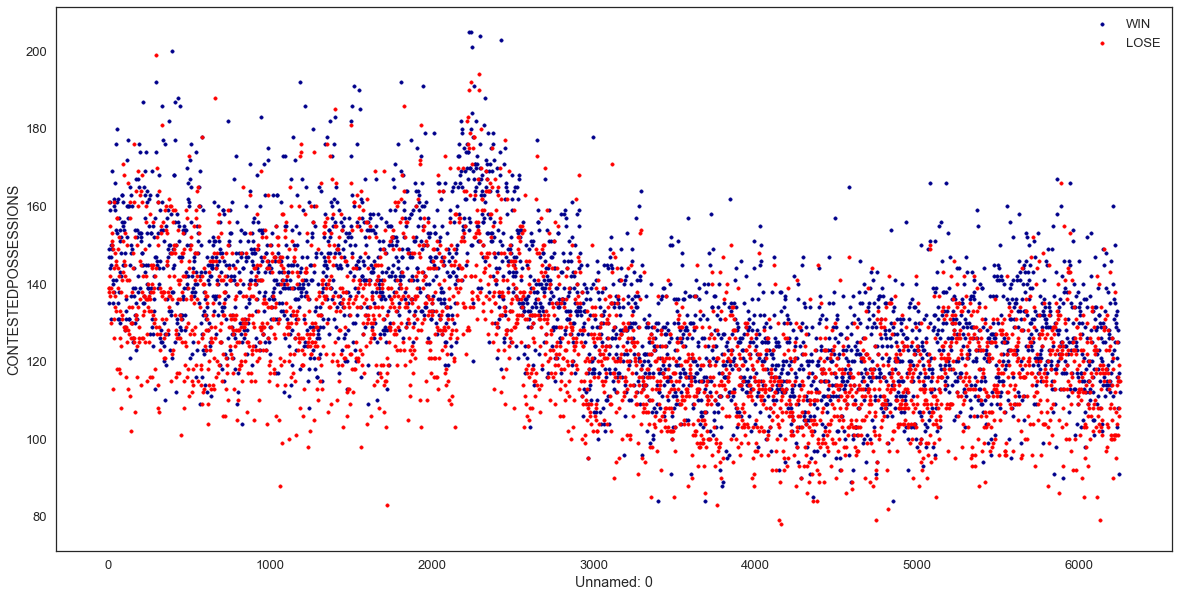

In [242]:
ax = df_win.plot(kind='scatter', x='Unnamed: 0', y="CONTESTEDPOSSESSIONS", s=12, color='DarkBlue', label='WIN' );

df_lose.plot(kind='scatter', x='Unnamed: 0', y="CONTESTEDPOSSESSIONS", s=12, color='Red', label='LOSE', ax=ax);

In [255]:
df_Melbourne = df_afl[df_afl.VENUE == "MCG"]
df_Sydney = df_afl[df_afl.VENUE != "MCG"]

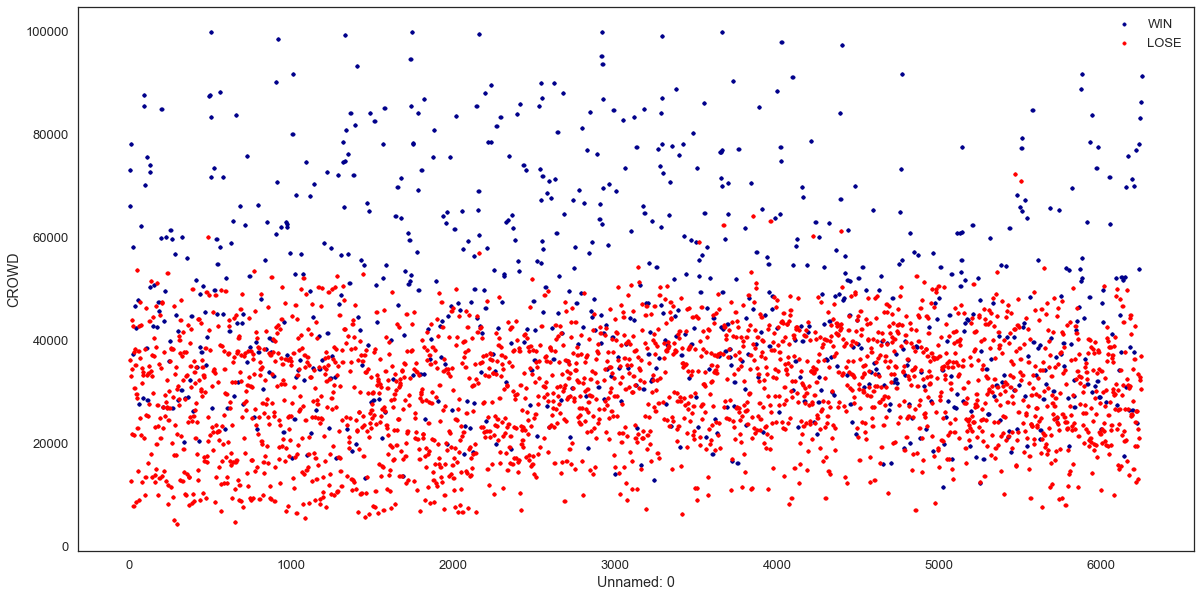

In [256]:
ax = df_Melbourne.plot(kind='scatter', x='Unnamed: 0', y="CROWD", s=12, color='DarkBlue', label='WIN' );

df_Sydney.plot(kind='scatter', x='Unnamed: 0', y="CROWD", s=12, color='Red', label='LOSE', ax=ax);